# Интерполяция

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import linalg
from scipy import interpolate

Под словом *интерполяция* в математике понимают процесс нахождени значений какой-либо функции в некоторой точке по ее значениям в других точках. Слово *интерполяция* восходит к латинскому *interpolatio*, происходящего от глагола *interpolire* ← *inter* (*между*) + *polire* (*шлифовать*, *полировать*). Таким образом, *интерполянт* - эта функция, «сглаживающая» заданные точки.

Пусть, например, у нас имеются данные:

In [2]:
x = np.array([0,  1,  2,  3,  4,  5,  6])
y = np.array([0, .6, .9,  1, .9, .6,  0])

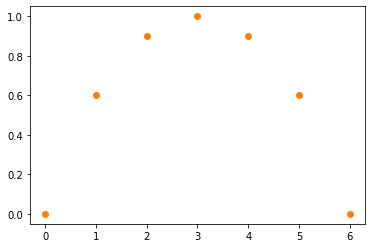

In [3]:
plt.plot(x, y, 'o', color='tab:orange')
pass

Нижен представлены два примера интерполянта, сглаживающего эти точки (пока вы можете не обращать внимания на код, с помощью которого мы получили эти рисунки).

**Кусочно-линейный интерполянт:**

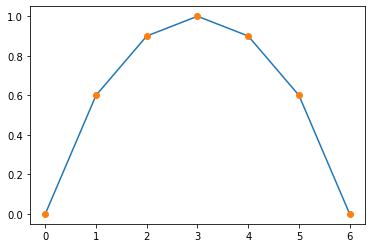

In [4]:
plt.plot(x, y, '-', color = 'tab:blue')
plt.plot(x, y, 'o', color = 'tab:orange')
pass

**Полиномиальный интеполянт:**

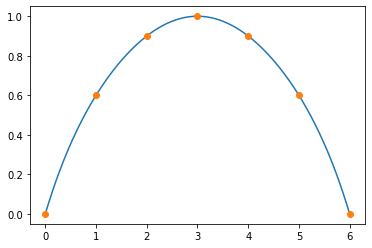

In [5]:
f = np.polyfit(x, y, 6)
xx = np.linspace(0, 6, 500)
yy = np.polyval(f, xx)
plt.plot(xx, yy, color = 'tab:blue')
plt.plot(x, y, 'or', color = 'tab:orange')
pass

**Кубический сплайн:**

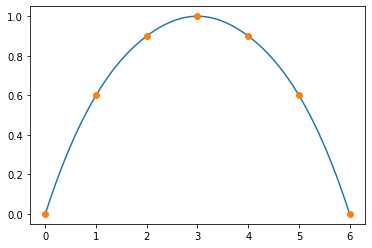

In [6]:
f = interpolate.interp1d(x, y, kind = 'cubic')
xx = np.linspace(0, 6, 500)
yy = f(xx)
plt.plot(xx, yy, color = 'tab:blue')
plt.plot(x, y, 'or', color = 'tab:orange')
pass

В общем случае имеется *таблица интерполяции*:
$$
\begin{array}{|c|c|c|c|}
\hline
x_0 & x_1 & \dots & x_n \\
\hline                  
y_0 & y_1 & \dots & y_n \\
\hline
\end{array}
$$
Предполагается, что точки $x_0, x_1, \dots, x_n$, называемые *узлами интерполяции* попарно различные, т.е. $x_i \ne x_j$ $(i\ne j)$.

*Интерполянтом* называется функция $f(x)$, принимающая в заданных ($n+1$) точках заданные значения, т.е. такая, что
$$
f(x_j) = y_j\qquad (j=0,1,\dots,n).
$$
Таким образом, график интерполянта проходит точно через заданные точки
$$
(x_0,y_0),\quad(x_1,y_1),\quad\dots,\quad(x_n,y_n).
$$

Если мы не накладываем никаких дополнительных ограничений на интерполянт, то ясно, что для одного и того же набора точек существует бесконечно много интерполянтов. Рассмотрим 2 разных способа интерполировать значения функции:

* интерполяционный многочлен
* кусочно-полиномиальный интерполянт

## Интерполяционный многочлен

Предположим, что интерполянт $f(x)$ - это многочлен степени не выше $n$:
$$
f(x)=a_0 x^n + a_1 x^{n-1} + \dots + a_{n-1} x + a_n.
$$
Если $f(x_j) = y_j$ $(j=0,1,\dots,n)$, то многочлен $f(x)$ называется *интерполяционным*.
Обратите внимение, что по $n+1$ точкам строится интерполяционный многочлен степени не выше $n$.

Для любой таблицы интерполяции интерполяционный многочлен существует и единственен.
Если интерполируемая функция $g(x)$ в некоторой области 
имеет $n$ непрерывных производных то для любой точки $x$ из этой области
погрешность интерполяции равна
$$
g(x)-f(x)=\frac{g^{(n)}(\xi)}{n!}(x-x_0)(x-x_1)\dots (x-x_n), \quad \mbox{где $x_0\le\xi\le x_n$},\quad x_0<x_1<\dots<x_n.
$$

Учитывая, что $f(x_j) = y_j$ $(j=0,1,\dots,n)$, получаем следующую квадратную систему линейных уравнений относительно неизвестных коэффициентов $a_0, a_1, \dots, a_n$:
$$
\left\{
\begin{array}{l}
a_0 x_0^n + a_1 x_0^{n-1} + \dots + a_{n-1} x_0 + a_n = y_0, \\
a_0 x_1^n + a_1 x_1^{n-1} + \dots + a_{n-1} x_1 + a_n = y_1, \\
\dots \\
a_0 x_n^n + a_1 x_n^{n-1} + \dots + a_{n-1} x_{n-1} + a_n = y_n \\
\end{array}
\right.
$$
($n+1$ уравнений, $n+1$ неизвестных).
Для нахождения коэффициентов достаточно решить эту систему.

Обратите внимание на вид матрицы этой системы. Это так называемая *матрица Вандермонда*:
$$
W = 
\left(
\begin{array}{ccccc}
    x_0^n &     x_0^{n-1} & \dots &    x_0  & 1 \\
    x_1^n &     x_1^{n-1} & \dots &    x_1  & 1 \\
\dots \\
    x_n^n &     x_n^{n-1} & \dots &    x_n  & 1 \\
\end{array}
\right).
$$
Если ввести также векторы
$$
a = 
\left(
\begin{array}{c}
    a_0     \\
    a_1     \\
    \vdots  \\
    a_n     \\
\end{array}
\right),
\qquad
y =
\left(
\begin{array}{c}
    y_0     \\
    y_1     \\
   \vdots   \\
    y_n     \\
\end{array}
\right),
$$
то система принимает вид $Wa = y$.

Если $x_i\ne x_j$ ($i\ne j$), то можно показать, что $\det W \ne 0$, поэтому система $Wa = y$ невырождена, откуда следует, что интерполяционный многочлен существует и единственен.

Матрицу Вандермонда можно получить с помощью функции `np.vander(x)`:

In [7]:
W = np.vander(x)
W

array([[    0,     0,     0,     0,     0,     0,     1],
       [    1,     1,     1,     1,     1,     1,     1],
       [   64,    32,    16,     8,     4,     2,     1],
       [  729,   243,    81,    27,     9,     3,     1],
       [ 4096,  1024,   256,    64,    16,     4,     1],
       [15625,  3125,   625,   125,    25,     5,     1],
       [46656,  7776,  1296,   216,    36,     6,     1]])

Теперь коэффициенты интерполяционного многочлена находим, решая систему линейных уравнений:

In [8]:
linalg.solve(W, y)

array([-2.77777778e-04,  5.00000000e-03, -3.61111111e-02,  1.33333333e-01,
       -3.63611111e-01,  8.61666667e-01, -0.00000000e+00])

Коэффициенты многочлена записываются в порядке убывания степени.

Коэффициенты интерполяционного многочлена также можно найти с помощью функции `f = np.polyfit(x, y, n)`:

In [9]:
f = np.polyfit(x, y, 6)
f

array([-2.77777778e-04,  5.00000000e-03, -3.61111111e-02,  1.33333333e-01,
       -3.63611111e-01,  8.61666667e-01, -6.92426548e-15])

Для вычисления многочлена в заданной точке `x0`, коэффициенты, которого записаны в векторе `f`, можно воспользоваться функцией `np.polyval(f, x0)`:

In [10]:
np.polyval(f, 1.5)

0.7763671874999978

Можно также найти значение интерполяционного многочлена сразу в нескольких точках:

In [11]:
np.polyval(f, [0.5, 1, 1.2, 1.5, 2])

array([0.35449219, 0.6       , 0.67753216, 0.77636719, 0.9       ])

Теперь мы можем нарисовать график интерполяционного многочлена:

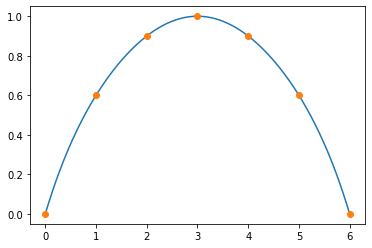

In [12]:
xx = np.linspace(0, 6, 500)
plt.plot(xx, np.polyval(f, xx))
plt.plot(x, y, 'o')
pass

Заметим, что вариант функции `polyfit`
```
f = np.polyfit(x, y, m)
``` 
где $m < n$, строит многочлен степени не выше $m$ методом наименьших квадратов. 
Об этом мы будем говорить на следующей лекции.

### Пример

Функцию $y=\ln x$ будем интерполировать кубическим полиномом
по точкам $0.4$, $0.5$, $0.7$, $0.8$. 

In [13]:
x = [0.4, 0.5, 0.7, 0.8]
y = np.log(x)
f = np.polyfit(x, y, 3)
print(f)

[ 1.68355894 -4.52394208  5.27601243 -2.41061274]


т.е. получили
$$
f(x) = 1.68 x^3   -4.52 x^2  + 5.28 x  -2.41.
$$

Найдем фактическую абсолютную ошибку:

In [14]:
np.polyval(f, 0.6) - np.log(0.6)

0.0008499212982679971

In [15]:
x_array = np.arange(0.4, 0.81, 0.01)
np.linalg.norm(np.polyval(f, x_array) - np.log(x_array), np.Inf)

0.0008507465211419207

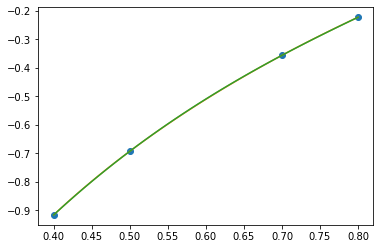

In [16]:
plt.plot(x, y, 'o', x_array, np.log(x_array), x_array, np.polyval(f, x_array))
pass

### Насколько хороша полиномиальная интерполяция? Феномен Рунге

В качестве еще одного примера рассмотрим *функцию Рунге*
$$
R(x)=\frac{1}{1+25x^2}
$$
и попробуем на отрезке $[-1,1]$ найти интерполянт к ней по равномерно распределенным точкам:

In [17]:
def runge_function(x):
    return 1/(1 + 25*x**2)

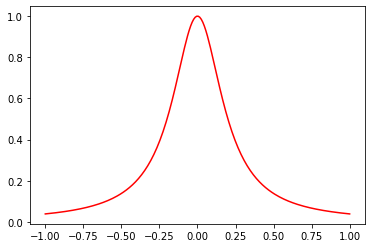

In [18]:
xx = np.linspace(-1, 1, 200)
yy = runge_function(xx)
plt.plot(xx, yy, 'r')
pass

Вначале построим интерполяционный многочлен по $5$ точкам, равномерно распределенным на отрезке $[-1,1]$:

In [19]:
n = 4
x = np.linspace(-1, 1, n + 1)
y = runge_function(x)
poly_coef = np.polyfit(x, y, n)
poly_values = np.polyval(poly_coef, xx)

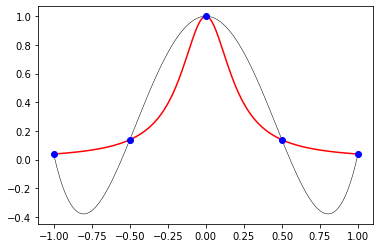

In [20]:
plt.plot(xx, yy, 'r')
plt.plot(xx, poly_values, 'k', linewidth = .5)
plt.plot(x, y, 'bo')
pass

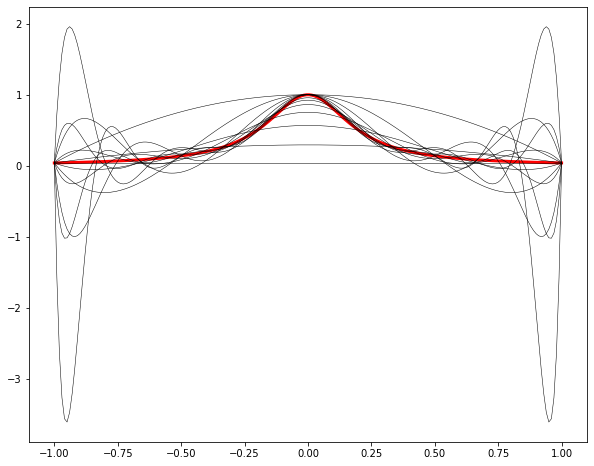

In [21]:
plt.figure(figsize = (10, 8))
plt.plot(xx, yy, 'r', linewidth = 3)

for n in range(1, 14):
    x = np.linspace(-1, 1, n + 1)
    y = runge_function(x)
    poly_coef = np.polyfit(x, y, n)
    poly_values = np.polyval(poly_coef, xx)
    plt.plot(xx, poly_values, 'k', linewidth = .5)

Мы видим, что с ростом $n$ интерполяционный многочлен начинает сильно осциллировать и хотя приближение интерполянта к интерполируемой функции в узлах интерполяции точное, в промежуточных точках ошибка быть очень большой. Можно доказать, что **для функции Рунге при равномерном выборе узлов интерполяции ошибка будет стремиться к бесконечности с ростом степени интерполяционного многочлена - интерполяционный процесс расходится**.

В частности, абсолютная ошибка аппроксимации многочленом степени $13$ равна

In [22]:
linalg.norm(yy - poly_values, np.Inf)

1.0638641092026289

In [1]:
from ipywidgets import interact

def interact_interp_runge(n = 10):
    plt.plot(xx, yy, 'r')
    x = np.linspace(-1, 1, n + 1)
    y = runge_function(x)
    poly_coef = np.polyfit(x, y, n)
    poly_values = np.polyval(poly_coef, xx)
    plt.plot(xx, poly_values, 'k', linewidth = .5)
    plt.ylim(-.5, 1.5)
    
interact(interact_interp_runge, n = (1, 19));

interactive(children=(IntSlider(value=10, description='n', max=19, min=1), Output()), _dom_classes=('widget-in…

Попробуем теперь сгустить точки около концов отрезка $[-1,1]$.
В качестве узлов интерполяции возьмем корни полиномов Чебышева:
    $$
     x_j = \cos \frac{(2j+1)\pi}{2(n+1)}
     \qquad
     (j=0,1,\dots,n)
    $$

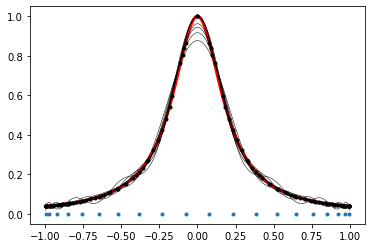

In [24]:
plt.plot(xx, yy, 'r', linewidth = 3)

for n in range(13, 20):
    j = np.arange(0, n + 1)
    x = np.cos((2*j + 1)*np.pi/(2*(n+1)))
    y = runge_function(x)
    poly_coef = np.polyfit(x, y, n)
    poly_values = np.polyval(poly_coef, xx)
    
    plt.plot(xx, poly_values, 'k', linewidth = .5)
    plt.plot(x, y, 'k.')

plt.plot(x, np.zeros(len(x)), '.')
pass

Затруднение с функцией Рунге исчезло. Абсолютная ошибка интерполяции этой функции полиномом $19$ степени составляет:

In [25]:
linalg.norm(yy - poly_values, np.Inf)

0.03737704566629774

Несмотря на то, что в конкретной ситуации - с функцией Рунге - нам удалось найти хороший интерполянт с помощью выбора узлов интерполяции, данная стратегия не всегда работает. *Теорема Фабера* говорит о том, что **не существует стратегии выборов узлов интерполяции, которая бы работала одинаково хорошо для любой непрерывной функции**.

Ввиду данного замечания **на практике полиномиальные интерполянты высоких степеней, как правило, не используются**.

## Кусочно-полиномиальная интерполяция

Функция $f(x)$ называется *кусочно-полиномиальной*, если на каждом из отрезков
$[x_j, x_{j+1}]$ ($j=0,1,\dots,n-1$; $x_0 < x_1 <\dots < x_n$)
она представляет собой многочлен степени не выше $m$:
$$
f_j(x)=a_{j0}x^m + a_{j1}x^{m-1} + \dots + a_{j,m-1}x + a_{jm} \qquad (j=0,1,\dots,n-1).
$$

Такие кусочно-полиномиальные интерполянты называют также *сплайнами* степени $m$.
За счет выбора коэффициентов указанных многочленов можно добиться того, чтобы график интерполянта не только проходил через заданные точки, но и был достаточно гладким (т.е. чтобы у него были непрерывными производные вплоть до некоторго порядка).

Построить сплайн можно с помощью функции `interp1d` из модуля `interpolate` библиотеки `scipy`:

`f = interpolate.interp1d(x, y, kind = 'linear')` - возвращает функцию, вычисляющую интеполянт.

Возможные значения параметра `kind` перечислены в таблице:

| Параметр                               | Интерполянт                                | Комментарии
|:---------------------------------------|:-------------------------------------------|:---------------------------------|
| `kind='zero'` или `'previous'` или `kind = 0` | ступенчатый                         |для каждой промежуточной точки ищется ближайшая *левая* табличная точка $x_j$; в качестве значения интерполянта в промежуточной точке берется $y_j$
| `kind='next'`                          | ступенчатый                                |для каждой промежуточной точки ищется ближайшая *правая* табличная точка $x_j$; в качестве значения интерполянта в промежуточной точке берется $y_j$
| `kind='nearest'`                       | ступенчатый                                |для каждой промежуточной точки ищется ближайшая табличная точка $x_j$; в качестве значения интерполянта в промежуточной точке берется $y_j$
| `kind='linear'`                        | кусочно-линейный (по умолчанию)            |на каждом отрезке $[x_j x_{j+1}]$ интерполянт представляет собой линейную функцию $L_j(x)$, при этом $L_j(x_j)=y_j$ и $L_j(x_{j+1})=y_{j+1}$
| `kind='slinear'` или `kind = 1`        | кусочно-линейный                           |то же, что и 'linear', но используется другой исходный код
| `kind='quadratic'` или `kind = 2`      | квадратичный сплайн                        |на каждом отрезке $[x_j x_{j+1}]$ интерполянт представляет собой квадратный многочлен $Q_j(x)$, при этом $Q_j(x_j)=y_j$ и $Q_j(x_{j+1})=y_{j+1}$; кроме того интерполянт имеет непрерывную производную во всех узловых точках и нулевую вторую производную в $x_0$
| `kind='cubic'` или `kind = 3`          | кубический сплайн                          |на каждом отрезке $[x_j x_{j+1}]$ интерполянт представляет собой кубическую функцию $S_j(x)$, при этом $S_j(x_j)=y_j$ и $S_j(x_{j+1})=y_{j+1}$; кроме того интерполянт имеет непрерывную первую и вторую производные во всех неконцевых узловых точках и нулевые вторые производные в концевых точках $x_0$ и $x_{n-1}$ (*естественный сплайн*)


### Пример

In [26]:
x = np.linspace(0, 10, 10)
y = np.sin(x)
f = interpolate.interp1d(x, y, kind = 'cubic')

In [27]:
f([0, 0.6, np.pi])

array([ 0.00000000e+00,  5.98732445e-01, -4.67967521e-04])

In [28]:
f_nearest   = interpolate.interp1d(x, y, kind = 'nearest')
f_linear    = interpolate.interp1d(x, y, kind = 'linear')
f_zero      = interpolate.interp1d(x, y, kind = 'zero')
f_quadratic = interpolate.interp1d(x, y, kind = 'quadratic')
f_cubic     = interpolate.interp1d(x, y, kind = 'cubic')

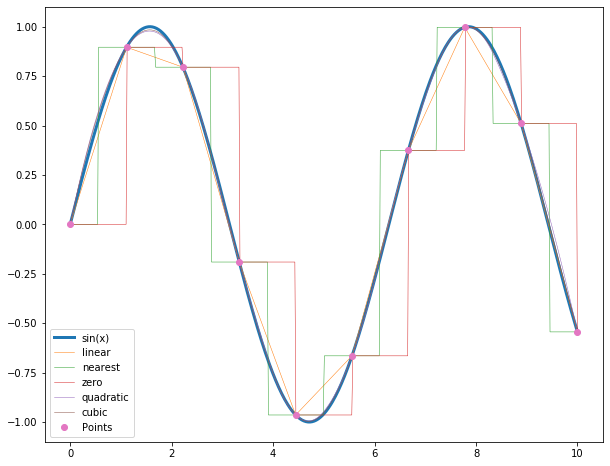

In [29]:
plt.figure(figsize = (10, 8))
xx = np.linspace(0, 10, 500)
plt.plot(xx, np.sin(xx),      label = 'sin(x)',    linewidth = 3)
plt.plot(xx, f_linear(xx),    label = 'linear',    linewidth = .5)
plt.plot(xx, f_nearest(xx),   label = 'nearest',   linewidth = .5)
plt.plot(xx, f_zero(xx),      label = 'zero',      linewidth = .5)
plt.plot(xx, f_quadratic(xx), label = 'quadratic', linewidth = .5)
plt.plot(xx, f_cubic(xx),     label = 'cubic',     linewidth = .5)
plt.plot(x, y, 'o', label = 'Points')
plt.legend()
pass

In [30]:
from ipywidgets import interact

def interact_interp_sin(deg = 1):
    interp = interpolate.interp1d(x, y, kind = deg)
    
    plt.figure(figsize = (10, 8))
    plt.plot(x, np.sin(x), 'o', color = 'tab:orange')
    plt.plot(xx, np.sin(xx), color = 'tab:blue')
    plt.plot(xx, interp(xx), color = 'tab:green', linewidth = .5)

interact(interact_interp_sin, deg = (0, 3));

interactive(children=(IntSlider(value=1, description='deg', max=3), Output()), _dom_classes=('widget-interact'…

## Как вычислить коэффициенты сплайна?

Рассмотрим, например, задачу вычисления коэффициентов квадратичного сплайна.

Требуется найти коэффициенты $a_j$, $b_j$, $c_j$ многочленов
$$
Q_j(x) = a_jx^2 + b_jx + c_j \qquad (j=0,1,\dots,n-1).
$$
Всего имеем $3n$ неопределенных коэффициентов.
На многочлены наложены следующие условия:
на концах отрезка $[x_j,x_{j+1}]$ многочлен $Q_j$ должен принимать значения $y_j$, $y_{j+1}$:
$$
\begin{array}{cc}
Q_0(x_0) = y_0, & Q_0(x_1) = y_1 \\
Q_1(x_1) = y_1, & Q_1(x_2) = y_2 \\
\vdots & \vdots \\
Q_{n-1}(x_{n-1}) = y_{n-1}, & Q_{n-1}(x_n) = y_n
\end{array}
$$
т.е.
$$
\begin{array}{cc}
a_0x_0^2 + b_0x_0 + c_0 = y_0, & a_0x_1^2 + b_0x_1 + c_0 = y_1 \\
a_1x_0^2 + b_1x_0 + c_1 = y_1, & a_1x_1^2 + b_1x_1 + c_1 = y_2 \\
\vdots & \vdots \\
a_{n-1}x_{n-2}^2 + b_{n-1}x_{n-2} + c_{n-1} = y_{n-1}, & a_{n-1}x_{n-1}^2 + b_{n-1}x_{n-1} + c_{n-1} = y_n \\
\end{array}
\tag{*}
$$
Кроме того, для любого внутреннего узла $x_j$ производные для левого многочлена $Q_{j-1}(x)$ и правого многочлена $Q_j(x)$должны совпадать:
$$
\begin{array}{cc}
Q'_0(x_1) = Q'_1(x_1) \\
Q'_1(x_2) = Q'_2(x_2) \\
\vdots \\
Q'_{n-2}(x_{n-1}) = Q'_{n-1}(x_{n-1}) \\
\end{array}
$$
т.е.
$$
\begin{array}{cc}
2a_0x_1 + b_0 = 2a_1x_1 + b_1 \\
2a_1x_2+ b_1 = 2a_2x_2 + b_2 \\
\vdots \\
2a_{n-2}x_{n-1} + b_{n-2} = 2a_{n-1}x_{n-1} + b_{n-1} \\
\end{array}
\tag{**}
$$
Еще одно ограничение - равенство нулю второй производной в левом узле: $Q''_0(x_0) = 0$, т.е.
$$
a_0 = 0 \tag{***}
$$

Всего получили $2n$ линейных ограничений вида $(*)$, $n-1$ ограничений вида $(**)$ и одного ограничение типа $(***)$ - всего $3n$ линейных ограничений. Из полученной систмы $3n$ линейных уравнений можно однозначно найти все $3n$ неизвестных коэффициентов $a_j$, $b_j$, $c_j$ $(j=0,1,\dots,n-1)$. 

Заметим, что система линейных уравнений, в которой число неизвестных равно числу уравнений, не обязательно имеет единственное решение, однако в данном случае можно доказать, что это так.

## Эрмитов кусочно-кубический интерполянт

Кроме рассмотренных выше интерполянтов на практике используется огромное множество других кусочно-полиномиальных интерполянтов см., например, функции модуля
[`interpolate`](https://docs.scipy.org/doc/scipy/reference/interpolate.html).

Рассмотрим, в частности, *эрмитов кусочно-кубический интерполянт* `pchip`
Как и кубический сплайн, этот интерполянт на каждом отрезке $[x_j x_{j+1}]$ представляет собой кубическую функцию $C_j(x)$, при этом $C_j(x_j)=y_j$ и $C_j(x_{j+1})=y_{j+1}$. Эрмитов кусочно-кубический интерполянт `pchip` имеет непрерывную первую производную, но, в отличие от кубического сплайна, может иметь разрывную вторую производную. С другой стороны, `pchip` может лучше воспроизводить поведение данных, чем кубический сплайн (особенно для негладких данных): интерполянт является монотонным на всех участках, где данные монотонны, и имеет экстремумы в тех точках, где имеются экстремумы данных.

Эрмитов кусочно-кубический интерполянт можно построить с помощью функции `PchipInterpolator` модуля `interpolate`.


Посмотрим, например, как выглядят квадратичный и кубический сплайны и эрмитов кусочно-кубический интерполянт для некоторого набора точек.

Обратите внимение, как ведут себя интерполянты на монотонном участке $[0,2]$ и в точке максимума $4$.
Также обратите внимание, что кубический сплайн более гладкий, чем квадратичный сплайн и кусочно-кубический интерполянт.


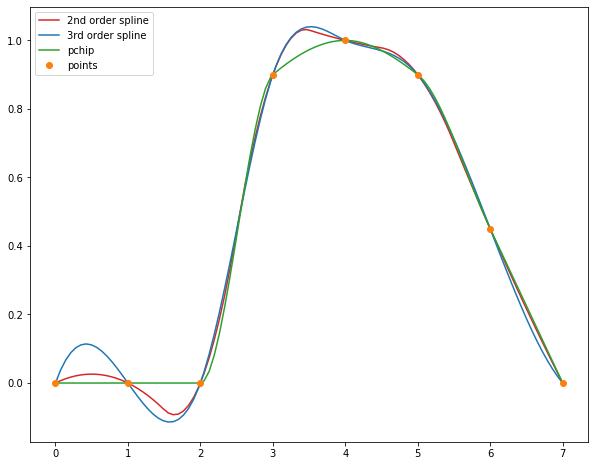

In [31]:
x = np.arange(0, 8)
y = np.array([0, 0, 0, .9, 1, .9, .45, 0])

spline2 = interpolate.interp1d(x, y, kind = 'quadratic')
spline3 = interpolate.interp1d(x, y, kind = 'cubic')
pchip  = interpolate.pchip(x, y)

xx = np.linspace(np.min(x), np.max(x), 100)
plt.figure(figsize = (10, 8))
plt.plot(xx, spline2(xx), color = 'tab:red',    label = '2nd order spline')
plt.plot(xx, spline3(xx), color = 'tab:blue', label = '3rd order spline')
plt.plot(xx, pchip(xx),   color = 'tab:green',  label = 'pchip')
plt.plot(x, y, 'o',       color = 'tab:orange',   label = 'points')

plt.legend(loc = 2)

pass

## Выводы

* Интерполяционный многочлен степени не выше $n$, построенный по $n+1$ точкам, существует и единственен.
* Интерполяционные многочлены высоких степеней, как правило, не используются на практике, так как интерполянт может сильно осциллировать в промежуточных точках. Тем самым, приближение в промежуточных точках будет неудовлетворительным.
* Для интерполяции функции по многим точкам обычно используют сплайны. Сплайны - это кусочно-плиномиалььные интерполянты, обладающие достаточной гладкостью.
* Кусочно-кубический интерполянт `pchip` лучше воспроизводит поведение данных, чем квадратичные и кубические сплайны: `pchip` монотонен на всех участках, где данные монотонны, и имеет экстремумы в тех точках, где имеются экстремумы в данных.